<a href="https://colab.research.google.com/gist/Praveenkumar1801/ec616b71a18ddb0a5b7fce1fb413707f/indu-6611_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import warnings

In [ ]:
data=pd.read_excel("Part_1.xlsx")

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   int64         
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   int64         
 6   Days                            2389 non-null   int64         
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2389.000000,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2389.000000,2389.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,1195.000000,7.268347,7.912908,0.154039,4.575136,1615.217664,16.867727,3.305567,0.570743,4.807451,...,34.250733,1615.217664,1.102135,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,689.789219,1.388350,1.558226,0.361062,1.432128,645.096047,16.942782,3.677022,0.230666,4.661194,...,31.590096,645.096047,0.611544,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,1.000000,3.000000,3.000000,0.000000,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,79.000000,0.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,598.000000,7.000000,8.000000,0.000000,4.000000,1174.000000,6.000000,1.000000,0.455000,2.000000,...,14.000000,1174.000000,1.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,1195.000000,8.000000,8.000000,0.000000,5.000000,1700.000000,12.000000,2.000000,0.600000,4.000000,...,26.000000,1700.000000,1.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,1792.000000,8.000000,8.000000,0.000000,5.000000,2048.000000,23.000000,4.000000,0.727000,6.000000,...,44.000000,2048.000000,1.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,2389.000000,12.000000,12.000000,1.000000,12.000000,4200.000000,257.000000,45.000000,1.000000,39.000000,...,313.000000,4200.000000,2.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.dtypes

ID                                         int64
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                             int64
Days                                       int64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                    int64
FRP.Active                                 int64
FRP.Cancelled                              int64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                              int64
Total.Discount.Pax                         int64
Initial.System.Date 

In [ ]:
df1=df.copy()

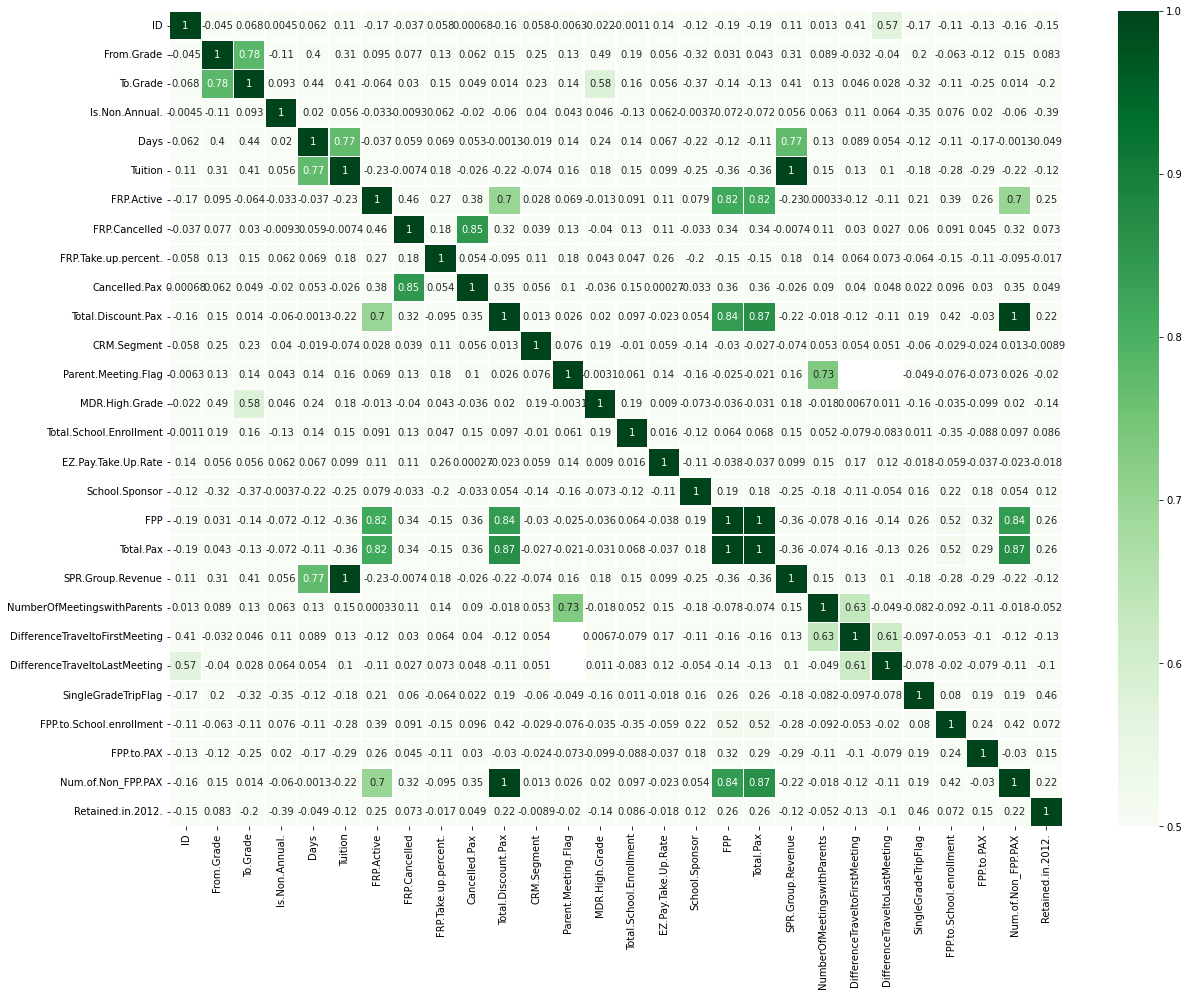

In [ ]:
import seaborn as sns
correlation_matrix = (df1).corr()

plt.figure(figsize = (20,15)) #For Size increase
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap="Greens",vmin= 0.5)
plt.show()

In [ ]:
df1.drop(['FRP.Active','FRP.Cancelled','Cancelled.Pax','SPR.Group.Revenue','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','GroupGradeTypeLow','GroupGradeTypeHigh','Num.of.Non_FPP.PAX','SchoolGradeTypeLow','SchoolGradeTypeHigh'],axis=1, inplace=True)
df1.drop(['NumberOfMeetingswithParents','FirstMeeting','LastMeeting','Early.RPL','Latest.RPL','Is.Non.Annual.','MDR.Low.Grade','MDR.High.Grade','MajorProgramCode'],axis=1, inplace=True)
df1.reindex()
print(df1.shape)

(2389, 36)


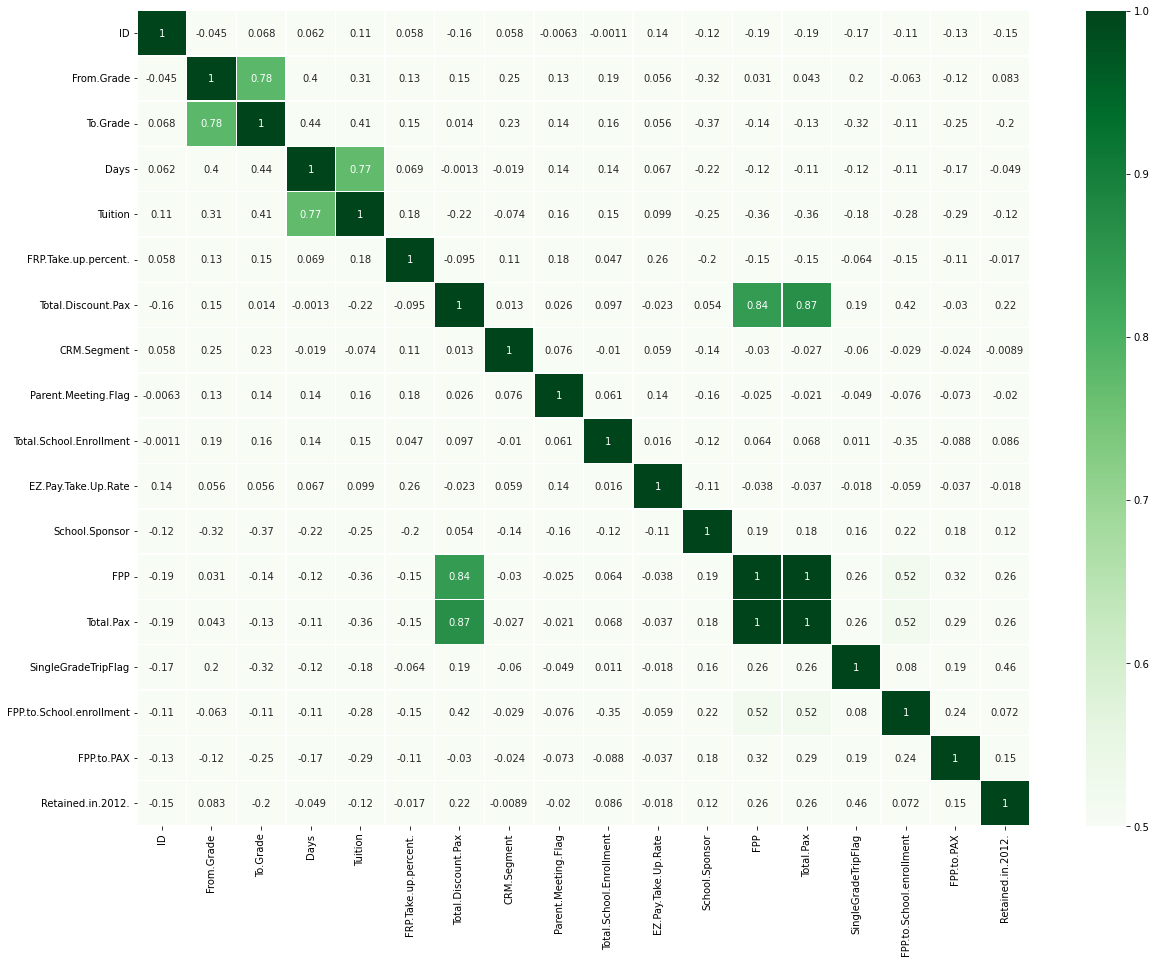

In [ ]:
correlation_matrix = (df1).corr()

plt.figure(figsize = (20,15)) #For Size increase
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap="Greens",vmin= 0.5)
plt.show()

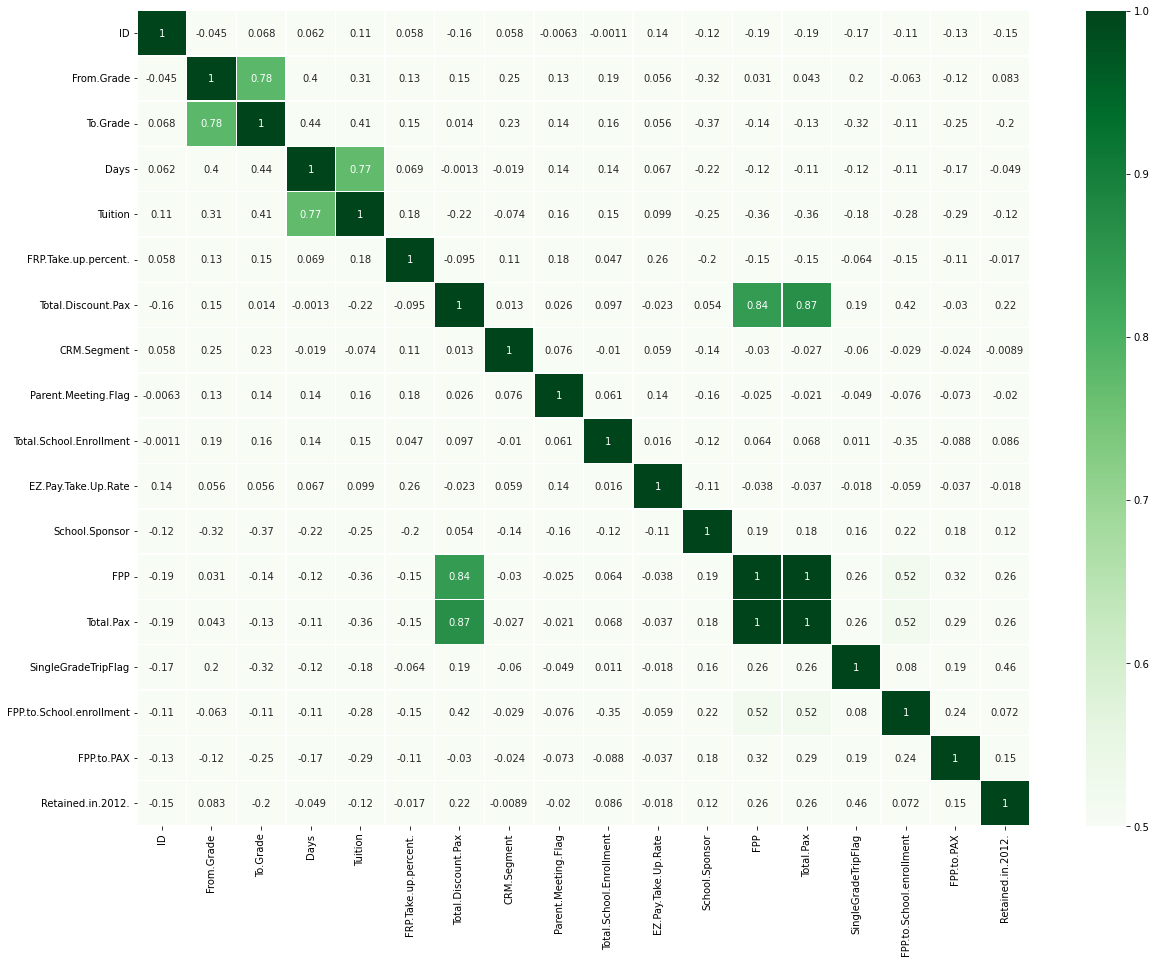

In [ ]:
correlation_matrix = (df1).corr()

plt.figure(figsize = (20,15)) #For Size increase
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap="Greens",vmin= 0.5)
plt.show()

In [ ]:
df1.isnull().sum()

ID                             0
Program.Code                   0
From.Grade                   127
To.Grade                     150
Group.State                    0
Days                           0
Travel.Type                    0
Departure.Date                 0
Return.Date                    0
Deposit.Date                   0
Special.Pay                 1919
Tuition                        0
FRP.Take.up.percent.           0
Total.Discount.Pax             0
Initial.System.Date            8
Poverty.Code                 599
Region                         0
CRM.Segment                    4
School.Type                    0
Parent.Meeting.Flag            0
Total.School.Enrollment       91
Income.Level                  62
EZ.Pay.Take.Up.Rate            0
School.Sponsor                 0
SPR.Product.Type               0
SPR.New.Existing               0
FPP                            0
Total.Pax                      0
SchoolGradeType                0
DepartureMonth                 0
GroupGrade

In [ ]:
#Replacing '0' with 'A' in poverty code column as it is being considered as null value and filling rest null values with 'U' as given in data file
df1["Poverty.Code"]=df1["Poverty.Code"].replace("0","A")
df1["Poverty.Code"]=df1["Poverty.Code"].fillna("U")
# Replacing null values with 'Z' given in data
df1["Income.Level"]=df1["Income.Level"].fillna("Z")

In [ ]:
#Replacing the 'NA' values with 'NU', since 'NA' are being comsidered as null values
df1["Special.Pay"]=df1["Special.Pay"].fillna("NU")

In [ ]:
df1.isnull().sum()

ID                            0
Program.Code                  0
From.Grade                  127
To.Grade                    150
Group.State                   0
Days                          0
Travel.Type                   0
Departure.Date                0
Return.Date                   0
Deposit.Date                  0
Special.Pay                   0
Tuition                       0
FRP.Take.up.percent.          0
Total.Discount.Pax            0
Initial.System.Date           8
Poverty.Code                  0
Region                        0
CRM.Segment                   4
School.Type                   0
Parent.Meeting.Flag           0
Total.School.Enrollment      91
Income.Level                  0
EZ.Pay.Take.Up.Rate           0
School.Sponsor                0
SPR.Product.Type              0
SPR.New.Existing              0
FPP                           0
Total.Pax                     0
SchoolGradeType               0
DepartureMonth                0
GroupGradeType                0
SingleGr

In [ ]:
#Dropping the rows with common values from all columns
df1 = df1.dropna(subset=['SchoolSizeIndicator','Total.School.Enrollment'], how='all')

In [ ]:
df1.isnull().sum()

ID                            0
Program.Code                  0
From.Grade                  114
To.Grade                    136
Group.State                   0
Days                          0
Travel.Type                   0
Departure.Date                0
Return.Date                   0
Deposit.Date                  0
Special.Pay                   0
Tuition                       0
FRP.Take.up.percent.          0
Total.Discount.Pax            0
Initial.System.Date           8
Poverty.Code                  0
Region                        0
CRM.Segment                   0
School.Type                   0
Parent.Meeting.Flag           0
Total.School.Enrollment       0
Income.Level                  0
EZ.Pay.Take.Up.Rate           0
School.Sponsor                0
SPR.Product.Type              0
SPR.New.Existing              0
FPP                           0
Total.Pax                     0
SchoolGradeType               0
DepartureMonth                0
GroupGradeType                0
SingleGr

In [ ]:
# Filling the 'From.Grade' and 'To.Grade' columns with mode values

#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(df1,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=df1[ColName].mode()[0]
    
    # replace nan values with most occured category
     df1[ColName + "_Imputed"] = df1[ColName]
     df1[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
#2. Call function to impute most occured category
for Columns in ['From.Grade','To.Grade']:
    impute_nan_most_frequent_category(df1,Columns)

<ipython-input-225-c6bbbc7955ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[ColName + "_Imputed"] = df1[ColName]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df1.isnull().sum()

ID                            0
Program.Code                  0
From.Grade                  114
To.Grade                    136
Group.State                   0
Days                          0
Travel.Type                   0
Departure.Date                0
Return.Date                   0
Deposit.Date                  0
Special.Pay                   0
Tuition                       0
FRP.Take.up.percent.          0
Total.Discount.Pax            0
Initial.System.Date           8
Poverty.Code                  0
Region                        0
CRM.Segment                   0
School.Type                   0
Parent.Meeting.Flag           0
Total.School.Enrollment       0
Income.Level                  0
EZ.Pay.Take.Up.Rate           0
School.Sponsor                0
SPR.Product.Type              0
SPR.New.Existing              0
FPP                           0
Total.Pax                     0
SchoolGradeType               0
DepartureMonth                0
GroupGradeType                0
SingleGr

In [ ]:
df1.dtypes

ID                                   int64
Program.Code                        object
From.Grade                         float64
To.Grade                           float64
Group.State                         object
Days                                 int64
Travel.Type                         object
Departure.Date              datetime64[ns]
Return.Date                 datetime64[ns]
Deposit.Date                datetime64[ns]
Special.Pay                         object
Tuition                              int64
FRP.Take.up.percent.               float64
Total.Discount.Pax                   int64
Initial.System.Date         datetime64[ns]
Poverty.Code                        object
Region                              object
CRM.Segment                        float64
School.Type                         object
Parent.Meeting.Flag                  int64
Total.School.Enrollment            float64
Income.Level                        object
EZ.Pay.Take.Up.Rate                float64
School.Spon

In [ ]:
df1.isnull().sum().sum()

258

In [ ]:
df1.shape

(2298, 38)

In [ ]:
df1

,ID,Program.Code,From.Grade,To.Grade,Group.State,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,...,SchoolGradeType,DepartureMonth,GroupGradeType,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,SchoolSizeIndicator,Retained.in.2012.,From.Grade_Imputed,To.Grade_Imputed
0,1,HS,4.0,4.0,CA,1,A,2011-01-14,2011-01-14,2010-08-30,...,Elementary->Elementary,January,K->Elementary,1,0.063646,0.936508,L,1,4.0,4.0
1,2,HC,8.0,8.0,AZ,7,A,2011-01-14,2011-01-21,2009-11-15,...,Middle->Middle,January,Middle->Middle,1,0.025882,0.880000,L,1,8.0,8.0
2,3,HD,8.0,8.0,FL,3,A,2011-01-15,2011-01-17,2010-10-15,...,Middle->Middle,January,Middle->Middle,1,0.025131,0.888889,L,1,8.0,8.0
4,5,HD,6.0,8.0,FL,6,T,2011-01-16,2011-01-21,2010-09-30,...,Middle->Middle,January,Middle->Middle,0,0.112500,0.910112,M-L,0,6.0,8.0
5,6,HC,10.0,12.0,LA,4,A,2011-01-17,2011-01-20,2010-09-30,...,High->High,January,High->High,0,0.010650,0.909091,L,1,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,6.0,8.0,VA,7,A,2011-06-27,2011-07-03,2010-11-19,...,Middle->Middle,June,Middle->Middle,0,0.007368,0.875000,L,0,6.0,8.0
2382,2383,SC,9.0,12.0,CA,7,A,2011-06-27,2011-07-03,2010-12-03,...,High->High,June,High->High,0,0.008772,0.909091,L,1,9.0,12.0
2384,2385,HC,7.0,8.0,CA,5,A,2011-06-28,2011-07-02,2010-12-15,...,Middle->Middle,June,Middle->Middle,0,0.018980,0.921053,L,0,7.0,8.0
2385,2386,HD,8.0,8.0,CA,5,A,2011-06-29,2011-07-03,2010-10-15,...,Middle->Middle,June,K->Middle,1,0.034783,0.909091,S-M,1,8.0,8.0


In [ ]:
#converting 'Departure.date' column into separte day monmth and year columns
df1['Departure.Date']=pd.to_datetime(df1['Departure.Date'], format='%m/%d/%y')

In [ ]:
#creating Departure day , Departure Month and departure year columns
import datetime
df1['Departure.day']=df1['Departure.Date'].dt.day
df1['Departure.month']=df1['Departure.Date'].dt.month
df1['Departure.year']=df1['Departure.Date'].dt.year

In [ ]:
# Dropping 'Departure.date' column as the date has been extracted into separte individual coulmns of day month and year
df1.drop(['Departure.Date'],axis=1, inplace=True)
df1.reindex()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2388
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2298 non-null   int64         
 1   Program.Code              2298 non-null   object        
 2   From.Grade                2184 non-null   float64       
 3   To.Grade                  2162 non-null   float64       
 4   Group.State               2298 non-null   object        
 5   Days                      2298 non-null   int64         
 6   Travel.Type               2298 non-null   object        
 7   Return.Date               2298 non-null   datetime64[ns]
 8   Deposit.Date              2298 non-null   datetime64[ns]
 9   Special.Pay               2298 non-null   object        
 10  Tuition                   2298 non-null   int64         
 11  FRP.Take.up.percent.      2298 non-null   float64       
 12  Total.Discount.Pax  

Group.State
CA    452
TX    171
IL     73
WA     61
MI     55
CO     46
FL     42
OH     34
AZ     34
WI     34
MN     31
MO     29
OR     25
TN     25
MA     24
NE     23
IN     20
LA     17
IA     16
OK     16
KS     14
AL     13
NV     12
NM     12
VA     12
GA     12
CT     11
NY      9
KY      8
NH      7
HI      6
MS      6
SD      6
NC      5
ME      5
MD      4
AR      4
UT      4
ND      3
RI      3
SC      3
ID      2
PA      2
AK      2
MT      1
VT      1
NJ      1
WY      1
WV      0
Name: Retained.in.2012., dtype: int64


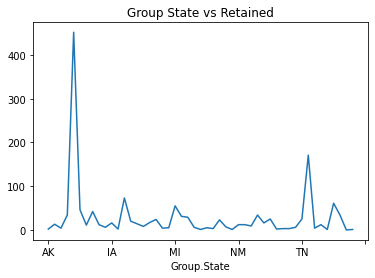

In [ ]:
## Visualize by Group State vs Retained
School_type = df1.groupby("Group.State")["Retained.in.2012."].sum()
print(School_type.sort_values(ascending=False))
School_type.plot(kind="line", title = "Group State vs Retained", x ="Group State", y = "Retained")

Poverty.Code
B    564
U    348
C    264
A    194
D     16
E      9
0      2
Name: Retained.in.2012., dtype: int64


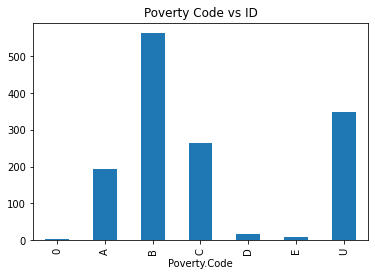

In [ ]:
## Visualize by Poverty Code vs Retained
Poverty_code = df1.groupby("Poverty.Code")["Retained.in.2012."].sum()
print(Poverty_code.sort_values(ascending=False))
Poverty_code.plot(kind="bar", title = "Poverty Code vs ID", x ="Poverty Code", y = "Retained")

Travel.Type
A    1150
B     243
N       0
T       4
Name: Retained.in.2012., dtype: int64


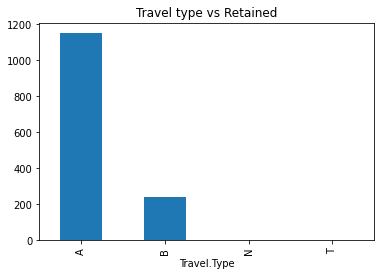

In [ ]:
## Visualize by travel type vs Retained
Travel_type = df1.groupby("Travel.Type")["Retained.in.2012."].sum()
print(Travel_type)
Travel_type.plot(kind="bar", title = "Travel type vs Retained", x ="Travel Type", y = "Retained")

Tuition
79      1
100     1
119     0
143     1
149     1
       ..
3628    0
3799    0
3884    1
4199    0
4200    1
Name: Retained.in.2012., Length: 1202, dtype: int64


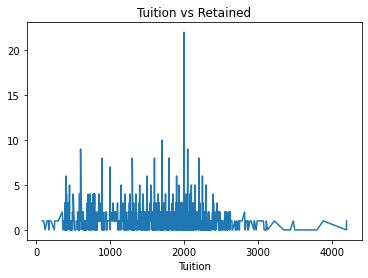

In [ ]:
## Visualize by Tuition vs Retained
Tuition = df1.groupby("Tuition")["Retained.in.2012."].sum()
print(Tuition)
Tuition.plot(kind="line", title = "Tuition vs Retained", x ="Tuition", y = "Retained")

Return.Date
2011-01-14    1
2011-01-17    1
2011-01-20    1
2011-01-21    1
2011-01-23    0
             ..
2011-06-30    3
2011-07-01    3
2011-07-02    2
2011-07-03    2
2011-07-05    1
Name: Retained.in.2012., Length: 140, dtype: int64


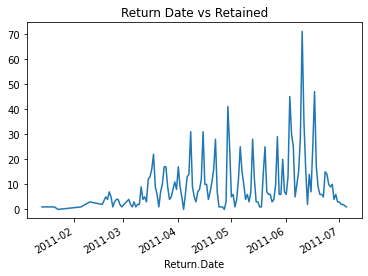

In [ ]:
## Visualize by Return type vs Retained
Return_Date = df1.groupby("Return.Date")["Retained.in.2012."].sum()
print(Return_Date)
Return_Date.plot(kind="line", title = "Return Date vs Retained", x ="Return Date", y = "Retained")

Region
Dallas                  157
Houston                 142
Northern California     265
Other                  1118
Pacific Northwest       192
Southern California     424
Name: Retained.in.2012., dtype: int64


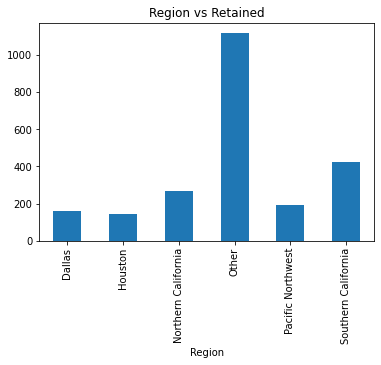

In [ ]:
## Visualize by Region vs Retained
Region_by_retained = df1.groupby("Region")["Retained.in.2012."].count()
print(Region_by_retained)
Region_by_retained.plot(kind="bar", title = "Region vs Retained", x ="Region", y = "Reained")

CRM.Segment
1.0      29
2.0      21
3.0       5
4.0     129
5.0     558
6.0      46
7.0      20
8.0      17
9.0       2
10.0    562
11.0      8
Name: Retained.in.2012., dtype: int64


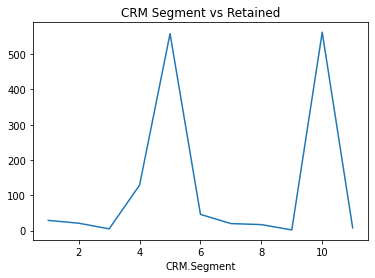

In [ ]:
## Visualize by CRM Segment vs Retained
CRM_Segment = df1.groupby("CRM.Segment")["Retained.in.2012."].sum()
print(CRM_Segment)
CRM_Segment.plot(kind="line", title = "CRM Segment vs Retained", x ="CRM Segment", y = "Retained")

School.Sponsor
0    2057
1     241
Name: Retained.in.2012., dtype: int64


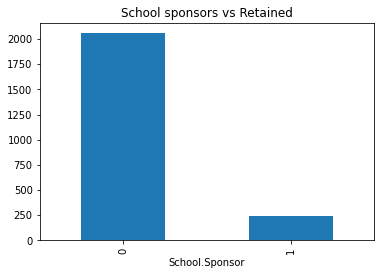

In [ ]:
## Visualize by School sponsors vs Retained
School_sponsors = df1.groupby("School.Sponsor")["Retained.in.2012."].count()
print(School_sponsors)
School_sponsors.plot(kind="bar", title = "School sponsors vs Retained", x ="School sponsors", y = "Retained")

SchoolSizeIndicator
L      402
M-L    392
S      229
S-M    374
Name: Retained.in.2012., dtype: int64


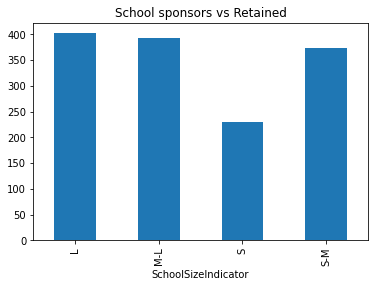

In [ ]:
## Visualize by School Size Indicator vs Retained
School_SizeIndicator = df1.groupby("SchoolSizeIndicator")["Retained.in.2012."].sum()
print(School_SizeIndicator)
School_SizeIndicator.plot(kind="bar", title = "School sponsors vs Retained", x ="School sponsors", y = "Retained")

In [ ]:
# Dropping some correlated columns
df1.drop(['SchoolSizeIndicator','Departure.month','Departure.year','Departure.day','From.Grade','To.Grade','Initial.System.Date','Deposit.Date','SchoolGradeType','GroupGradeType','Return.Date','EZ.Pay.Take.Up.Rate','FRP.Take.up.percent.','FPP.to.School.enrollment'],axis=1, inplace=True)

In [ ]:
df1.rename({"Retained.in.2012.":"Retained"}, axis=1, inplace=True)

In [ ]:
df1.dtypes

ID                           int64
Program.Code                object
Group.State                 object
Days                         int64
Travel.Type                 object
Special.Pay                 object
Tuition                      int64
Total.Discount.Pax           int64
Poverty.Code                object
Region                      object
CRM.Segment                float64
School.Type                 object
Parent.Meeting.Flag          int64
Total.School.Enrollment    float64
Income.Level                object
School.Sponsor               int64
SPR.Product.Type            object
SPR.New.Existing            object
FPP                          int64
Total.Pax                    int64
DepartureMonth              object
SingleGradeTripFlag          int64
FPP.to.PAX                 float64
Retained                     int64
From.Grade_Imputed         float64
To.Grade_Imputed           float64
dtype: object

In [ ]:
df1

,ID,Program.Code,Group.State,Days,Travel.Type,Special.Pay,Tuition,Total.Discount.Pax,Poverty.Code,Region,...,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,DepartureMonth,SingleGradeTripFlag,FPP.to.PAX,Retained,From.Grade_Imputed,To.Grade_Imputed
0,1,HS,CA,1,A,NU,424,4,B,Southern California,...,CA History,EXISTING,59,63,January,1,0.936508,1,4.0,4.0
1,2,HC,AZ,7,A,CP,2350,3,C,Other,...,East Coast,EXISTING,22,25,January,1,0.880000,1,8.0,8.0
2,3,HD,FL,3,A,NU,1181,3,C,Other,...,East Coast,EXISTING,24,27,January,1,0.888889,1,8.0,8.0
4,5,HD,FL,6,T,NU,865,8,D,Other,...,East Coast,EXISTING,81,89,January,0,0.910112,0,6.0,8.0
5,6,HC,LA,4,A,NU,2025,1,C,Other,...,East Coast,NEW,10,11,January,0,0.909091,1,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,VA,7,A,NU,2650,1,B,Other,...,Costa Rica,EXISTING,7,8,June,0,0.875000,0,6.0,8.0
2382,2383,SC,CA,7,A,NU,2519,1,B,Southern California,...,Costa Rica,NEW,10,11,June,0,0.909091,1,9.0,12.0
2384,2385,HC,CA,5,A,NU,1892,3,C,Southern California,...,East Coast,EXISTING,35,38,June,0,0.921053,0,7.0,8.0
2385,2386,HD,CA,5,A,FR,1699,2,C,Southern California,...,East Coast,EXISTING,20,22,June,1,0.909091,1,8.0,8.0


In [ ]:
df2 = df1.copy()
df5 = df1.copy()
df5

,ID,Program.Code,Group.State,Days,Travel.Type,Special.Pay,Tuition,Total.Discount.Pax,Poverty.Code,Region,...,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,DepartureMonth,SingleGradeTripFlag,FPP.to.PAX,Retained,From.Grade_Imputed,To.Grade_Imputed
0,1,HS,CA,1,A,NU,424,4,B,Southern California,...,CA History,EXISTING,59,63,January,1,0.936508,1,4.0,4.0
1,2,HC,AZ,7,A,CP,2350,3,C,Other,...,East Coast,EXISTING,22,25,January,1,0.880000,1,8.0,8.0
2,3,HD,FL,3,A,NU,1181,3,C,Other,...,East Coast,EXISTING,24,27,January,1,0.888889,1,8.0,8.0
4,5,HD,FL,6,T,NU,865,8,D,Other,...,East Coast,EXISTING,81,89,January,0,0.910112,0,6.0,8.0
5,6,HC,LA,4,A,NU,2025,1,C,Other,...,East Coast,NEW,10,11,January,0,0.909091,1,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,VA,7,A,NU,2650,1,B,Other,...,Costa Rica,EXISTING,7,8,June,0,0.875000,0,6.0,8.0
2382,2383,SC,CA,7,A,NU,2519,1,B,Southern California,...,Costa Rica,NEW,10,11,June,0,0.909091,1,9.0,12.0
2384,2385,HC,CA,5,A,NU,1892,3,C,Southern California,...,East Coast,EXISTING,35,38,June,0,0.921053,0,7.0,8.0
2385,2386,HD,CA,5,A,FR,1699,2,C,Southern California,...,East Coast,EXISTING,20,22,June,1,0.909091,1,8.0,8.0


In [ ]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

####Ordinal Encoding
Encoded_Data_Ordinal = df2[['Income.Level']]

encoder = OrdinalEncoder() #define ordinal encoding
result = encoder.fit_transform(Encoded_Data_Ordinal) # transform data
#Replacing in main data
df2[Encoded_Data_Ordinal.columns] = result

In [ ]:
df2[['Region','Travel.Type','SPR.New.Existing','Program.Code','Special.Pay','Group.State','SPR.Product.Type','Poverty.Code','School.Type','DepartureMonth']]=df2[['Region','Travel.Type','SPR.New.Existing','Program.Code','Special.Pay','Group.State','SPR.Product.Type','Poverty.Code','School.Type','DepartureMonth']].astype(str)

In [ ]:
####One-Hot Encoding
#One Hot Columns
Data_OneHot = df2[['Region','Travel.Type','Special.Pay','SPR.New.Existing','Program.Code','Group.State','SPR.Product.Type','Poverty.Code','School.Type','DepartureMonth']]

encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(Data_OneHot)
Encoded_Data_OneHot = pd.DataFrame(onehot,columns=encoder.get_feature_names())
Encoded_Data_OneHot
#Dropping Existing ones
df2.drop(['Region','Travel.Type','Special.Pay','SPR.New.Existing','Program.Code','Group.State','SPR.Product.Type','Poverty.Code','School.Type','DepartureMonth'],axis=1, inplace= True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df2[encoder.get_feature_names()] = Encoded_Data_OneHot

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
df2.dtypes

ID                      int64
Days                    int64
Tuition                 int64
Total.Discount.Pax      int64
CRM.Segment           float64
                       ...   
x9_February           float64
x9_January            float64
x9_June               float64
x9_March              float64
x9_May                float64
Length: 131, dtype: object

In [ ]:
from numpy.ma.core import shape
# Import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

## Lets create X and Y
M = df2.drop(['Retained'],axis='columns') 
n = df2.Retained
print(M.shape)
print(n.shape)

(2298, 130)
(2298,)


In [ ]:
df2.isnull().sum().sum()

9890

In [ ]:
N = M.copy()
N

,ID,Days,Tuition,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,Total.School.Enrollment,Income.Level,School.Sponsor,FPP,...,x8_CHD,x8_Catholic,x8_PUBLIC,x8_Private non-Christian,x9_April,x9_February,x9_January,x9_June,x9_March,x9_May
0,1,1,424,4,4.0,1,927.0,19.0,1,59,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,7,2350,3,10.0,1,850.0,0.0,0,22,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,3,1181,3,10.0,1,955.0,14.0,0,24,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,6,865,8,10.0,1,720.0,2.0,0,81,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6,4,2025,1,8.0,1,939.0,8.0,0,10,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,7,2650,1,6.0,1,950.0,19.0,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2382,2383,7,2519,1,6.0,1,1140.0,14.0,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384,2385,5,1892,3,10.0,0,1844.0,3.0,0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2385,2386,5,1699,2,4.0,1,575.0,19.0,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
M = np.nan_to_num(M.astype(np.float32))
print(M)

[[1.000e+00 1.000e+00 4.240e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 7.000e+00 2.350e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 3.000e+00 1.181e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.385e+03 5.000e+00 1.892e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.386e+03 5.000e+00 1.699e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.389e+03 6.000e+00 2.135e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


In [ ]:
# Split the dataset into 80% train, 20% test
M_train, M_test, n_train, n_test= train_test_split(M, n,test_size=0.2,random_state=1)
# INITIATE DECISION TREE CLASSIFIER
rf = RandomForestClassifier()

In [ ]:
#Train_M = np.nan_to_num(M_train.astype(np.float32))
#print(Train_M)

In [ ]:
#Test_M = np.nan_to_num(M_test.astype(np.float32))
#print(Test_M)

In [ ]:
# Fit dt to the training set
rf.fit(M_train,n_train)

# Predict the test set labels
n_pred = rf.predict(M_test)
# Evaluate the test-set accuracy
classification_report = classification_report(n_test,n_pred)
print(classification_report)
confusion_matrix = confusion_matrix(n_test,n_pred)
print(confusion_matrix)
mean_squared_error = mean_squared_error(n_test,n_pred)
print(mean_squared_error) 
print("Accuracy:",metrics.accuracy_score(n_test,n_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       173
           1       0.79      0.80      0.80       287

    accuracy                           0.75       460
   macro avg       0.73      0.73      0.73       460
weighted avg       0.74      0.75      0.75       460

[[113  60]
 [ 57 230]]
0.2543478260869565
Accuracy: 0.7456521739130435


In [ ]:
C_pred = rf.predict(M)
C_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
predicted_df = pd.DataFrame(data=C_pred, columns=['Future_Trip'], 
                            index=N.index.copy())
df_out = pd.merge(df1, predicted_df, how ='left', left_index=True, 
                 right_index=True)
df_out.info()
df3 = df_out.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2388
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2298 non-null   int64  
 1   Program.Code             2298 non-null   object 
 2   Group.State              2298 non-null   object 
 3   Days                     2298 non-null   int64  
 4   Travel.Type              2298 non-null   object 
 5   Special.Pay              2298 non-null   object 
 6   Tuition                  2298 non-null   int64  
 7   Total.Discount.Pax       2298 non-null   int64  
 8   Poverty.Code             2298 non-null   object 
 9   Region                   2298 non-null   object 
 10  CRM.Segment              2298 non-null   float64
 11  School.Type              2298 non-null   object 
 12  Parent.Meeting.Flag      2298 non-null   int64  
 13  Total.School.Enrollment  2298 non-null   float64
 14  Income.Level            

In [ ]:
##How many people already got retained
Group_Retained = df3.groupby("Retained")["Program.Code"].count()
Group_Retained

Retained
0     901
1    1397
Name: Program.Code, dtype: int64

In [ ]:
##How many people are likely to come for future
Group_future_donation = df3.groupby("Future_Trip")["Program.Code"].count()
Group_future_donation

Future_Trip
0     898
1    1400
Name: Program.Code, dtype: int64

In [ ]:
future_trip_Retained = df3.groupby("Program.Code")["Retained"].count()
df4 = future_trip_Retained.to_frame(name='Program code Retained')
print(df4)

              Program code Retained
Program.Code                       
CC                               14
CD                              106
CN                                4
CVP                               3
HC                              265
HD                             1383
HF                                5
HG                               23
HH                                3
HIS                               4
HN                               70
HO                               11
HP                                2
HS                              126
HVP                              57
HW                                9
HX                                3
HY                                6
HZ                                6
IC                               12
IK                                3
SC                               46
SD                                4
SG                               20
SK                               65
SM                          

### **PART B**

In [ ]:
data2 = pd.read_excel("Part2.xlsx")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2389 non-null   int64         
 1   NPS 2011        1812 non-null   float64       
 2   NPS 2010        1160 non-null   float64       
 3   NPS 2009        1164 non-null   float64       
 4   NPS 2008        977 non-null    float64       
 5   >= 3 FPP Date   2380 non-null   datetime64[ns]
 6   >= 10 FPP Date  1980 non-null   datetime64[ns]
 7   >= 20 FPP Date  1365 non-null   datetime64[ns]
 8   >= 35 FPP Date  771 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(4), int64(1)
memory usage: 168.1 KB


In [ ]:
data2.isnull().sum()

ID                   0
NPS 2011           577
NPS 2010          1229
NPS 2009          1225
NPS 2008          1412
>= 3 FPP Date        9
>= 10 FPP Date     409
>= 20 FPP Date    1024
>= 35 FPP Date    1618
dtype: int64

In [ ]:
df6 = pd.merge(df2,data2, on=['ID'],how='left')
df6

,ID,Days,Tuition,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,Total.School.Enrollment,Income.Level,School.Sponsor,FPP,...,x9_March,x9_May,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
0,1,1,424,4,4.0,1,927.0,19.0,1,59,...,0.0,0.0,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
1,2,7,2350,3,10.0,1,850.0,0.0,0,22,...,0.0,0.0,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
2,3,3,1181,3,10.0,1,955.0,14.0,0,24,...,0.0,0.0,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
3,5,6,865,8,10.0,1,720.0,2.0,0,81,...,0.0,0.0,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01
4,6,4,2025,1,8.0,1,939.0,8.0,0,10,...,0.0,0.0,10.0,NaN,NaN,NaN,2010-08-19,2010-12-15,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,7,2650,1,6.0,1,950.0,19.0,0,7,...,NaN,NaN,7.0,10.0,9.0,NaN,2010-11-16,NaT,NaT,NaT
2294,2383,7,2519,1,6.0,1,1140.0,14.0,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-15,2010-12-01,NaT,NaT
2295,2385,5,1892,3,10.0,0,1844.0,3.0,0,35,...,NaN,NaN,9.0,10.0,9.0,9.0,2010-12-05,2010-12-13,2010-12-15,2011-04-28
2296,2386,5,1699,2,4.0,1,575.0,19.0,0,20,...,NaN,NaN,10.0,10.0,10.0,NaN,2010-06-20,2010-10-12,2010-11-09,NaT


In [ ]:
df6.isnull().sum()

ID                       0
Days                     0
Tuition                  0
Total.Discount.Pax       0
CRM.Segment              0
                      ... 
NPS 2008              1353
>= 3 FPP Date            9
>= 10 FPP Date         398
>= 20 FPP Date         987
>= 35 FPP Date        1557
Length: 139, dtype: int64

In [ ]:
df6.describe()

,ID,Days,Tuition,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,Total.School.Enrollment,Income.Level,School.Sponsor,FPP,...,x9_April,x9_February,x9_January,x9_June,x9_March,x9_May,NPS 2011,NPS 2010,NPS 2009,NPS 2008
count,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,1751.000000,1118.000000,1129.000000,945.000000
mean,1196.646214,4.574848,1616.018712,2.964752,6.939513,0.865970,648.358573,11.194952,0.104874,31.244560,...,0.221971,0.018987,0.002712,0.382911,0.163201,0.210217,9.402627,9.474061,9.410983,9.361905
std,688.528172,1.430075,643.109225,2.894468,2.778783,0.340758,411.727720,4.900875,0.306457,29.228973,...,0.415666,0.136511,0.052023,0.486207,0.369632,0.407555,1.065068,0.878851,1.042239,1.061772
min,1.000000,1.000000,79.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,1.000000
25%,598.250000,4.000000,1174.000000,1.000000,5.000000,1.000000,360.000000,8.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,9.000000
50%,1199.500000,5.000000,1703.500000,2.000000,6.000000,1.000000,597.000000,11.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,10.000000
75%,1792.750000,5.000000,2046.750000,4.000000,10.000000,1.000000,825.750000,14.000000,0.000000,41.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,10.000000,10.000000,10.000000
max,2389.000000,12.000000,4200.000000,47.000000,11.000000,1.000000,3990.000000,20.000000,1.000000,286.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category1(df6,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category1=df6[ColName].mode()[0]
    
    # replace nan values with most occured category
     df6[ColName + "_Imputed"] = df6[ColName]
     df6[ColName + "_Imputed"].fillna(most_frequent_category1,inplace=True)
#2. Call function to impute most occured category
for Columns in ['NPS 2011','NPS 2010','NPS 2009','NPS 2008']:
    impute_nan_most_frequent_category1(df6,Columns)

In [ ]:
#mode_value_2011 = df6['NPS 2011'].mode()
#mode_value_2010 = df6['NPS 2010'].mode()
#mode_value_2009 = df6['NPS 2009'].mode()
#mode_value_2008 = df6['NPS 2008'].mode()
#df6['NPS 2011'].fillna(value=mode_value_2011, inplace=True)
#df6['NPS 2010'].fillna(value=mode_value_2010, inplace=True)
#df6['NPS 2009'].fillna(value=mode_value_2009, inplace=True)
#df6['NPS 2008'].fillna(value=mode_value_2008, inplace=True)
df6.isnull().sum()

ID                       0
Days                     0
Tuition                  0
Total.Discount.Pax       0
CRM.Segment              0
                      ... 
>= 35 FPP Date        1557
NPS 2011_Imputed         0
NPS 2010_Imputed         0
NPS 2009_Imputed         0
NPS 2008_Imputed         0
Length: 143, dtype: int64

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2297
Columns: 143 entries, ID to NPS 2008_Imputed
dtypes: datetime64[ns](4), float64(129), int64(10)
memory usage: 2.5 MB


In [ ]:
df6.rename(columns={'>= 3 FPP Date': '3_FPP_DATE', '>= 10 FPP Date': '10_FPP_Date','>= 20 FPP Date': '20_FPP_Date','>= 35 FPP Date': '35_FPP_Date'},inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2297
Columns: 143 entries, ID to NPS 2008_Imputed
dtypes: datetime64[ns](4), float64(129), int64(10)
memory usage: 2.5 MB


In [ ]:
#converting 'Departure.date' column into separte day monmth and year columns
df6['35_FPP_Date'] = pd.to_datetime(df6['35_FPP_Date'],format='%m/%d/%Y')
#creating Departure day , Departure Month and departure year columns
import datetime
df6['FPP_day']=df6['35_FPP_Date'].dt.day
df6['FPP_month']=df6['35_FPP_Date'].dt.month
df6['FPP_year']=df6['35_FPP_Date'].dt.year

In [ ]:
df6

,ID,Days,Tuition,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,Total.School.Enrollment,Income.Level,School.Sponsor,FPP,...,10_FPP_Date,20_FPP_Date,35_FPP_Date,NPS 2011_Imputed,NPS 2010_Imputed,NPS 2009_Imputed,NPS 2008_Imputed,FPP_day,FPP_month,FPP_year
0,1,1,424,4,4.0,1,927.0,19.0,1,59,...,2010-06-18,2010-08-17,2010-08-30,10.0,10.0,10.0,10.0,30.0,8.0,2010.0
1,2,7,2350,3,10.0,1,850.0,0.0,0,22,...,2010-01-20,2010-05-31,NaT,9.0,10.0,10.0,10.0,NaN,NaN,NaN
2,3,3,1181,3,10.0,1,955.0,14.0,0,24,...,2010-06-09,2010-10-26,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN
3,5,6,865,8,10.0,1,720.0,2.0,0,81,...,2010-05-24,2010-05-27,2010-06-01,10.0,10.0,10.0,10.0,1.0,6.0,2010.0
4,6,4,2025,1,8.0,1,939.0,8.0,0,10,...,2010-12-15,NaT,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,7,2650,1,6.0,1,950.0,19.0,0,7,...,NaT,NaT,NaT,7.0,10.0,9.0,10.0,NaN,NaN,NaN
2294,2383,7,2519,1,6.0,1,1140.0,14.0,0,10,...,2010-12-01,NaT,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN
2295,2385,5,1892,3,10.0,0,1844.0,3.0,0,35,...,2010-12-13,2010-12-15,2011-04-28,9.0,10.0,9.0,9.0,28.0,4.0,2011.0
2296,2386,5,1699,2,4.0,1,575.0,19.0,0,20,...,2010-10-12,2010-11-09,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN


In [ ]:
df6.drop(['35_FPP_Date','20_FPP_Date','3_FPP_DATE','10_FPP_Date'],axis=1,inplace=True)
df6

,ID,Days,Tuition,Total.Discount.Pax,CRM.Segment,Parent.Meeting.Flag,Total.School.Enrollment,Income.Level,School.Sponsor,FPP,...,NPS 2010,NPS 2009,NPS 2008,NPS 2011_Imputed,NPS 2010_Imputed,NPS 2009_Imputed,NPS 2008_Imputed,FPP_day,FPP_month,FPP_year
0,1,1,424,4,4.0,1,927.0,19.0,1,59,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,30.0,8.0,2010.0
1,2,7,2350,3,10.0,1,850.0,0.0,0,22,...,10.0,10.0,NaN,9.0,10.0,10.0,10.0,NaN,NaN,NaN
2,3,3,1181,3,10.0,1,955.0,14.0,0,24,...,10.0,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN
3,5,6,865,8,10.0,1,720.0,2.0,0,81,...,NaN,10.0,NaN,10.0,10.0,10.0,10.0,1.0,6.0,2010.0
4,6,4,2025,1,8.0,1,939.0,8.0,0,10,...,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,7,2650,1,6.0,1,950.0,19.0,0,7,...,10.0,9.0,NaN,7.0,10.0,9.0,10.0,NaN,NaN,NaN
2294,2383,7,2519,1,6.0,1,1140.0,14.0,0,10,...,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN
2295,2385,5,1892,3,10.0,0,1844.0,3.0,0,35,...,10.0,9.0,9.0,9.0,10.0,9.0,9.0,28.0,4.0,2011.0
2296,2386,5,1699,2,4.0,1,575.0,19.0,0,20,...,10.0,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN


In [ ]:
df6.isnull().sum()

ID                       0
Days                     0
Tuition                  0
Total.Discount.Pax       0
CRM.Segment              0
                      ... 
NPS 2009_Imputed         0
NPS 2008_Imputed         0
FPP_day               1557
FPP_month             1557
FPP_year              1557
Length: 142, dtype: int64

In [ ]:
from numpy.ma.core import shape
# Import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

## Lets create X and Y
A = df6.drop(columns=['Retained']) 
b = df6.Retained
print(A.shape)
print(b.shape)

(2298, 141)
(2298,)


In [ ]:
A = np.nan_to_num(A.astype(np.float32))
print(A)
A.shape

[[1.000e+00 1.000e+00 4.240e+02 ... 3.000e+01 8.000e+00 2.010e+03]
 [2.000e+00 7.000e+00 2.350e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 3.000e+00 1.181e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.385e+03 5.000e+00 1.892e+03 ... 2.800e+01 4.000e+00 2.011e+03]
 [2.386e+03 5.000e+00 1.699e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.389e+03 6.000e+00 2.135e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


(2298, 141)

In [ ]:
# Split the dataset into 80% train, 20% test
A_train, A_test, b_train, b_test= train_test_split(A, b,test_size=0.2,random_state=1)
# INITIATE Random CLASSIFIER
rf1 = RandomForestClassifier()

In [ ]:
# Fit dt to the training set
rf1.fit(A_train,b_train)

# Predict the test set labels
b_pred = rf1.predict(A_test)
# Evaluate the test-set accuracy
classification_report = classification_report(b_test,b_pred)
print(classification_report)
confusion_matrix = confusion_matrix(b_test,b_pred)
print(confusion_matrix)
mean_squared_error = mean_squared_error(b_test,b_pred)
print(mean_squared_error) 
print("Accuracy:",metrics.accuracy_score(b_test,b_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       173
           1       0.82      0.85      0.84       287

    accuracy                           0.79       460
   macro avg       0.78      0.77      0.78       460
weighted avg       0.79      0.79      0.79       460

[[121  52]
 [ 44 243]]
0.20869565217391303
Accuracy: 0.7913043478260869


# **Lets try XGBoost**

In [ ]:
from numpy.ma.core import shape
# Import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

## Lets create X and Y
X = df6.drop(columns=['Retained']) 
y = df6.Retained
print(X.shape)
print(y.shape)

(2298, 141)
(2298,)


In [ ]:
X = np.nan_to_num(X.astype(np.float32))
print(X)
X.shape

[[1.000e+00 1.000e+00 4.240e+02 ... 3.000e+01 8.000e+00 2.010e+03]
 [2.000e+00 7.000e+00 2.350e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 3.000e+00 1.181e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.385e+03 5.000e+00 1.892e+03 ... 2.800e+01 4.000e+00 2.011e+03]
 [2.386e+03 5.000e+00 1.699e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.389e+03 6.000e+00 2.135e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


(2298, 141)

In [ ]:
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)
# INITIATE XGBOOST CLASSIFIER
XGB = XGBClassifier()

In [ ]:
# Fit dt to the training set
XGB.fit(X_train,y_train)

# Predict the test set labels
y_pred = XGB.predict(X_test)
# Evaluate the test-set accuracy
classification_report = classification_report(y_test,y_pred)
print(classification_report)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
mean_squared_error = mean_squared_error(y_test,y_pred)
print(mean_squared_error) 
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       173
           1       0.83      0.84      0.84       287

    accuracy                           0.79       460
   macro avg       0.78      0.78      0.78       460
weighted avg       0.79      0.79      0.79       460

[[124  49]
 [ 46 241]]
0.20652173913043478
Accuracy: 0.7934782608695652


In [ ]:
Future_pred = XGB.predict(X)
Future_pred.shape

(2298,)

In [ ]:
## Adding predicted value to the intital dataframe
predict_df = pd.DataFrame(data=Future_pred, columns=['Future_retained'], 
                            index=df6.index.copy())
df7 = pd.merge(df1, predict_df, how ='left',left_index=True, 
                 right_index=True)
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2388
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2298 non-null   int64  
 1   Program.Code             2298 non-null   object 
 2   Group.State              2298 non-null   object 
 3   Days                     2298 non-null   int64  
 4   Travel.Type              2298 non-null   object 
 5   Special.Pay              2298 non-null   object 
 6   Tuition                  2298 non-null   int64  
 7   Total.Discount.Pax       2298 non-null   int64  
 8   Poverty.Code             2298 non-null   object 
 9   Region                   2298 non-null   object 
 10  CRM.Segment              2298 non-null   float64
 11  School.Type              2298 non-null   object 
 12  Parent.Meeting.Flag      2298 non-null   int64  
 13  Total.School.Enrollment  2298 non-null   float64
 14  Income.Level            

In [ ]:
##Dropping rows which has NA value in Future retained column
df8 = df7[df7.Future_retained >= 0]
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2297
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2212 non-null   int64  
 1   Program.Code             2212 non-null   object 
 2   Group.State              2212 non-null   object 
 3   Days                     2212 non-null   int64  
 4   Travel.Type              2212 non-null   object 
 5   Special.Pay              2212 non-null   object 
 6   Tuition                  2212 non-null   int64  
 7   Total.Discount.Pax       2212 non-null   int64  
 8   Poverty.Code             2212 non-null   object 
 9   Region                   2212 non-null   object 
 10  CRM.Segment              2212 non-null   float64
 11  School.Type              2212 non-null   object 
 12  Parent.Meeting.Flag      2212 non-null   int64  
 13  Total.School.Enrollment  2212 non-null   float64
 14  Income.Level            

In [ ]:
##How many people are likely to come in the future
future_people = df8.groupby("Future_retained")["School.Type"].count()
future_people

Future_retained
0.0     802
1.0    1410
Name: School.Type, dtype: int64

In [ ]:
##How many people are likely to come in the future
Past_retained = df8.groupby("Retained")["School.Type"].count()
Past_retained

Retained
0     850
1    1362
Name: School.Type, dtype: int64

In [ ]:
df9 = df8[df8['Future_retained'] == 1]
Future_retained_people = df9.groupby("School.Type")["Future_retained"].count()
df10 = Future_retained_people.to_frame(name='Future Retained people')
print(df10)

                       Future Retained people
School.Type                                  
CHD                                       151
Catholic                                  108
PUBLIC                                   1045
Private non-Christian                     106


In [ ]:
## People already got retained
df11 = df1[df1['Retained'] == 1]
Past_retained = df11.groupby("School.Type")["Retained"].count()
df12 = Past_retained.to_frame(name='Past Retained')
print(df12)

                       Past Retained
School.Type                         
CHD                              132
Catholic                         106
PUBLIC                          1048
Private non-Christian            111


In [ ]:
##Total tirps
past_retained_type = df1.groupby("School.Type")["Retained"].count()
df13 = past_retained_type.to_frame(name='Total Trip')
print(df13)

                       Total Trip
School.Type                      
CHD                           207
Catholic                      163
PUBLIC                       1777
Private non-Christian         151


In [ ]:
## Merge all three columns together
df14 = pd.merge(df13,df12, on=['School.Type'])
df15 = pd.merge(df14,df10, on=['School.Type'])
df15

,Total Trip,Past Retained,Future Retained people
School.Type,,,
CHD,207,132,151
Catholic,163,106,108
PUBLIC,1777,1048,1045
Private non-Christian,151,111,106


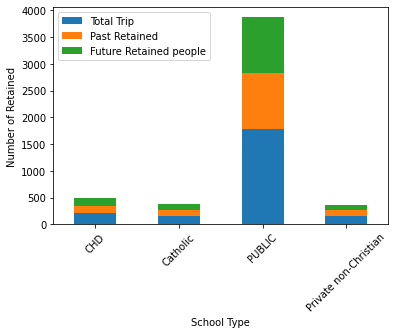

In [ ]:
df15.plot(kind="bar",rot ='45',stacked=True)
plt.xlabel("School Type")
plt.ylabel("Number of Retained")
plt.legend()
plt.show()

In [ ]:
Future_retained_region = df9.groupby("Region")["Future_retained"].count()
df16 = Future_retained_region.to_frame(name='Future Retained people')
print(df16)

                     Future Retained people
Region                                     
Dallas                                   98
Houston                                  85
Northern California                     168
Other                                   705
Pacific Northwest                        90
Southern California                     264


In [ ]:
Past_retained_region = df11.groupby("Region")["Retained"].count()
df17 = Past_retained_region.to_frame(name='Past Retained')
print(df17)

                     Past Retained
Region                            
Dallas                          89
Houston                         82
Northern California            162
Other                          688
Pacific Northwest               86
Southern California            290


In [ ]:
##Total trips
total_retained_region = df1.groupby("Region")["Retained"].count()
df18 = total_retained_region.to_frame(name='Total Trip')
print(df18)

                     Total Trip
Region                         
Dallas                      157
Houston                     142
Northern California         265
Other                      1118
Pacific Northwest           192
Southern California         424


In [ ]:
## Merge of dataframes
df19 = pd.merge(df18,df16, on=['Region'],how='left')
df20 = pd.merge(df19,df17, on=['Region'],how='left')
df20

,Total Trip,Future Retained people,Past Retained
Region,,,
Dallas,157,98,89
Houston,142,85,82
Northern California,265,168,162
Other,1118,705,688
Pacific Northwest,192,90,86
Southern California,424,264,290


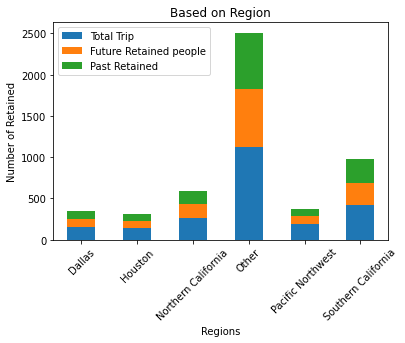

In [ ]:
df20.plot(kind="bar",rot ='45',stacked=True)
plt.title("Based on Region")
plt.xlabel("Regions")
plt.ylabel("Number of Retained")
plt.legend()
plt.show()